# 1. Carga y preparación inicial

In [1]:
import pandas as pd

df_cusco = pd.read_csv("../data/processed/df_cusco.csv")

# Eliminar índice inútil si viene de to_csv(index=True)
df_cusco = df_cusco.drop(columns=['Unnamed: 0'], errors='ignore')

# Asegurar tipo datetime y ordenar
df_cusco['fecha'] = pd.to_datetime(df_cusco['fecha'])
df_cusco = df_cusco.sort_values('fecha')

# Filtrar por Cusco por seguridad (igual ya solo viene Cusco)
df_cusco = df_cusco[df_cusco['departamento'] == 'Cusco']

# Poner fecha como índice para trabajo de series
df_cusco = df_cusco.set_index('fecha').sort_index()


In [2]:
df_cusco

,departamento,PRECTOTCORR,RH2M,T2M,T2M_MAX,T2M_MIN,WS10M,Avg_Ingreso_total_mensual,cantidad_crimenes,afluencia_turistica
fecha,,,,,,,,,,
2014-01-01,Cusco,5.637097,83.906129,8.171290,13.635484,3.602903,2.319355,1638.616084,14328,358664
2014-02-01,Cusco,4.140000,86.311071,8.222143,13.294286,4.130357,2.112857,1044.545486,14328,318300
2014-03-01,Cusco,1.949355,84.668065,8.180645,13.830645,3.789355,2.122258,2042.420088,14328,361956
2014-04-01,Cusco,1.489000,84.022333,8.011333,13.490667,3.870333,2.107000,1314.329876,14328,395990
2014-05-01,Cusco,0.441613,82.233871,7.386452,13.585484,2.720968,2.143548,1068.688484,14328,428638
...,...,...,...,...,...,...,...,...,...,...
2024-08-01,Cusco,0.009355,69.837419,9.081613,17.233548,3.713871,2.882258,1603.871996,21335,845650
2024-09-01,Cusco,0.471667,70.036333,10.050333,17.602667,4.911000,3.018000,3706.095237,21335,789666
2024-10-01,Cusco,0.807419,72.406774,10.076129,16.952258,5.031935,2.898065,1505.281487,21335,840010


In [3]:
print(df_cusco.shape)
print(df_cusco.dtypes)
print(df_cusco.index.min(), df_cusco.index.max())
print(df_cusco.isna().sum())
print(df_cusco['departamento'].value_counts())


(132, 10)
departamento                  object
PRECTOTCORR                  float64
RH2M                         float64
T2M                          float64
T2M_MAX                      float64
T2M_MIN                      float64
WS10M                        float64
Avg_Ingreso_total_mensual    float64
cantidad_crimenes              int64
afluencia_turistica            int64
dtype: object
2014-01-01 00:00:00 2024-12-01 00:00:00
departamento                 0
PRECTOTCORR                  0
RH2M                         0
T2M                          0
T2M_MAX                      0
T2M_MIN                      0
WS10M                        0
Avg_Ingreso_total_mensual    0
cantidad_crimenes            0
afluencia_turistica          0
dtype: int64
departamento
Cusco    132
Name: count, dtype: int64


# 2. Entendimiento de la variable objetivo afluencia_turistica

In [4]:
y = df_cusco['afluencia_turistica']
print(y.describe())
from scipy import stats
print("Kurtosis (Fisher=False):", stats.kurtosis(y, fisher=False))


count       132.000000
mean     489195.257576
std      189823.307636
min        2116.000000
25%      395967.500000
50%      519749.000000
75%      613995.500000
max      845650.000000
Name: afluencia_turistica, dtype: float64
Kurtosis (Fisher=False): 3.4338238827265113


In [5]:
#Identificar la fecha del mínimo (sospechoso de COVID)
print(y.idxmin(), y.min())


2020-06-01 00:00:00 2116


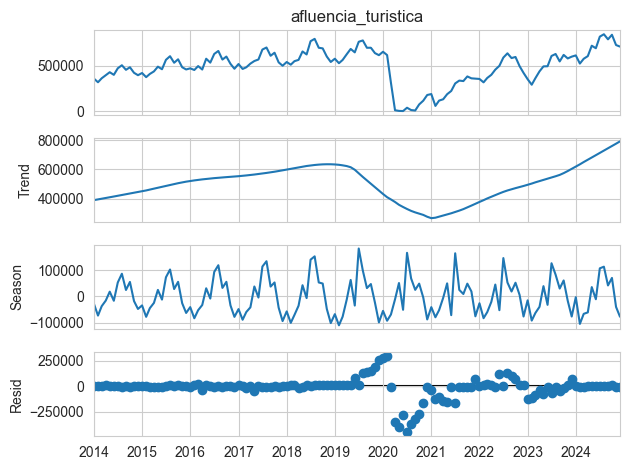

In [6]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Cerrar figuras previas para evitar duplicados
plt.close('all')

# Descomposición STL
stl = sm.tsa.STL(y, period=12, robust=True)
res_stl = stl.fit()

# Graficar solo una vez
fig = res_stl.plot()
plt.tight_layout()
plt.show()


# 3. Entendimiento de las variables explicativas

In [7]:
num_cols = ['PRECTOTCORR', 'RH2M', 'T2M', 'T2M_MAX', 'T2M_MIN', 'WS10M',
            'Avg_Ingreso_total_mensual', 'cantidad_crimenes', 'afluencia_turistica']

df_cusco[num_cols].describe()

,PRECTOTCORR,RH2M,T2M,T2M_MAX,T2M_MIN,WS10M,Avg_Ingreso_total_mensual,cantidad_crimenes,afluencia_turistica
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,2.076978,78.493218,8.607773,15.022630,3.833189,2.441340,1528.611734,15007.909091,489195.257576
std,3.142585,5.215545,0.833729,1.209652,0.828831,0.299235,708.577436,3379.495607,189823.307636
min,0.000645,65.298000,6.749000,12.799355,1.356333,1.913333,268.010118,9271.000000,2116.000000
25%,0.274113,73.874909,8.061371,14.057624,3.364605,2.217048,1077.392673,11818.000000,395967.500000
50%,1.162333,78.726559,8.577091,15.056129,3.917581,2.375857,1403.960036,14801.000000,519749.000000
75%,3.345242,83.604008,9.156290,15.684403,4.437562,2.641083,1766.220801,16321.000000,613995.500000
max,30.396786,87.304138,10.660000,18.567667,5.758667,3.274667,4814.699302,21335.000000,845650.000000


In [8]:
corr = df_cusco[num_cols].corr()
corr_afluencia = corr['afluencia_turistica'].sort_values(ascending=False)
print(corr_afluencia)

afluencia_turistica          1.000000
cantidad_crimenes            0.363976
T2M_MAX                      0.281563
WS10M                        0.234490
Avg_Ingreso_total_mensual    0.168847
T2M                          0.156679
T2M_MIN                      0.046001
PRECTOTCORR                 -0.111395
RH2M                        -0.255695
Name: afluencia_turistica, dtype: float64


In [9]:
exog_cols = ['PRECTOTCORR','RH2M','T2M','T2M_MAX','T2M_MIN','WS10M',
             'Avg_Ingreso_total_mensual','cantidad_crimenes']
df_cusco[exog_cols].corr()

,PRECTOTCORR,RH2M,T2M,T2M_MAX,T2M_MIN,WS10M,Avg_Ingreso_total_mensual,cantidad_crimenes
PRECTOTCORR,1.000000,0.404669,0.020074,-0.272786,0.156224,-0.141434,-0.025996,-0.016436
RH2M,0.404669,1.000000,-0.341135,-0.831699,0.063974,-0.769192,0.050867,-0.168582
T2M,0.020074,-0.341135,1.000000,0.763988,0.876760,0.490124,0.105785,0.372708
T2M_MAX,-0.272786,-0.831699,0.763988,1.000000,0.410029,0.749756,0.038192,0.387781
T2M_MIN,0.156224,0.063974,0.876760,0.410029,1.000000,0.165326,0.130926,0.280629
WS10M,-0.141434,-0.769192,0.490124,0.749756,0.165326,1.000000,-0.077900,0.179848
Avg_Ingreso_total_mensual,-0.025996,0.050867,0.105785,0.038192,0.130926,-0.077900,1.000000,0.129852
cantidad_crimenes,-0.016436,-0.168582,0.372708,0.387781,0.280629,0.179848,0.129852,1.000000


# 4. Detección de outliers

In [10]:
from collections import defaultdict

outlier_counts = defaultdict(int)
for col in num_cols:
    s = df_cusco[col]
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outliers = ((s < lower) | (s > upper)).sum()
    outlier_counts[col] = outliers

outlier_counts

defaultdict(int,
            {'PRECTOTCORR': np.int64(3),
             'RH2M': np.int64(0),
             'T2M': np.int64(0),
             'T2M_MAX': np.int64(1),
             'T2M_MIN': np.int64(3),
             'WS10M': np.int64(0),
             'Avg_Ingreso_total_mensual': np.int64(8),
             'cantidad_crimenes': np.int64(0),
             'afluencia_turistica': np.int64(7)})

# 5. Feature Engineering

In [11]:
df_fe = df_cusco.copy()

# Lags de la afluencia
for lag in [1, 2, 3, 12]:
    df_fe[f'afluencia_lag{lag}'] = df_fe['afluencia_turistica'].shift(lag)

# Media móvil 3 meses
df_fe['afluencia_roll3'] = df_fe['afluencia_turistica'].rolling(window=3).mean()

# Features de calendario
df_fe['mes'] = df_fe.index.month
df_fe['anio'] = df_fe.index.year

# Eliminar filas con NaN generados por lags/rolling
df_fe = df_fe.dropna()


In [12]:
df_fe

,departamento,PRECTOTCORR,RH2M,T2M,T2M_MAX,T2M_MIN,WS10M,Avg_Ingreso_total_mensual,cantidad_crimenes,afluencia_turistica,afluencia_lag1,afluencia_lag2,afluencia_lag3,afluencia_lag12,afluencia_roll3,mes,anio
fecha,,,,,,,,,,,,,,,,,
2015-01-01,Cusco,3.610000,83.447742,7.746452,13.262903,3.365806,2.314516,1553.512527,9271,419814,395900.0,422204.0,483134.0,358664.0,412639.333333,1,2015
2015-02-01,Cusco,4.072500,84.100714,8.197143,13.636071,3.679286,2.279286,1808.721111,9271,374610,419814.0,395900.0,422204.0,318300.0,396774.666667,2,2015
2015-03-01,Cusco,1.988710,84.473871,7.830000,13.768710,3.506129,2.249677,1999.606502,9271,409692,374610.0,419814.0,395900.0,361956.0,401372.000000,3,2015
2015-04-01,Cusco,6.132333,85.256667,7.753667,13.235667,3.801333,2.092000,835.340723,9271,437618,409692.0,374610.0,419814.0,395990.0,407306.666667,4,2015
2015-05-01,Cusco,0.469355,85.970000,7.484516,12.799355,3.674839,2.003548,2823.372920,9271,489884,437618.0,409692.0,374610.0,428638.0,445731.333333,5,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,Cusco,0.009355,69.837419,9.081613,17.233548,3.713871,2.882258,1603.871996,21335,845650,819468.0,691800.0,719826.0,628948.0,785639.333333,8,2024
2024-09-01,Cusco,0.471667,70.036333,10.050333,17.602667,4.911000,3.018000,3706.095237,21335,789666,845650.0,819468.0,691800.0,547144.0,818261.333333,9,2024
2024-10-01,Cusco,0.807419,72.406774,10.076129,16.952258,5.031935,2.898065,1505.281487,21335,840010,789666.0,845650.0,819468.0,618874.0,825108.666667,10,2024


# 6. Partición temporal de los dato

In [13]:
train_fe = df_fe.loc[:'2021-12-01']
test_fe  = df_fe.loc['2022-01-01':]

y_train = train_fe['afluencia_turistica']
y_test  = test_fe['afluencia_turistica']

feature_cols = [c for c in df_fe.columns if c not in ['afluencia_turistica', 'departamento']]
X_train = train_fe[feature_cols]
X_test  = test_fe[feature_cols]

train_fe.shape, test_fe.shape


((84, 17), (36, 17))

# 7. Modelos baseline (para saber con quién competimos)

In [14]:
import numpy as np, math
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mape(y_true, y_pred):
    return (np.abs((y_true - y_pred) / y_true)).replace([np.inf, -np.inf], np.nan).mean() * 100

def metrics(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": math.sqrt(mean_squared_error(y_true, y_pred)),
        "MAPE": mape(y_true, y_pred)
    }

# naive: todo el test igual al último valor de train
naive_forecast = y_test.copy()
naive_forecast[:] = y_train.iloc[-1]

baseline_naive = metrics(y_test, naive_forecast)
baseline_naive

{'MAE': 208935.27777777778,
 'RMSE': 250245.62778087542,
 'MAPE': np.float64(33.162274633128334)}

In [15]:
seasonal_naive = []
for date in y_test.index:
    prev_year = date - pd.DateOffset(years=1)
    if prev_year in y_train.index:
        seasonal_naive.append(y_train.loc[prev_year])
    else:
        seasonal_naive.append(y_train.iloc[-1])

seasonal_naive = pd.Series(seasonal_naive, index=y_test.index)
baseline_seasonal = metrics(y_test, seasonal_naive)
baseline_seasonal


{'MAE': 243140.72222222222,
 'RMSE': 270851.56425388757,
 'MAPE': np.float64(41.89507381679723)}

# 8. Modelo clásico: SARIMAX con exógenas

In [16]:
import statsmodels.api as sm
import itertools, warnings
warnings.filterwarnings("ignore")

y_train_arima = train_fe['afluencia_turistica']
y_test_arima  = test_fe['afluencia_turistica']

exog_cols = ['PRECTOTCORR','RH2M','T2M','T2M_MAX','T2M_MIN','WS10M',
             'Avg_Ingreso_total_mensual','cantidad_crimenes']

exog_train = train_fe[exog_cols]
exog_test  = test_fe[exog_cols]

p = d = q = range(0, 2)
pdq = list(itertools.product(p, [1], q))       # d=1
seasonal_pdq = [(1,1,1,12), (1,1,0,12), (0,1,1,12), (0,1,0,12)]

best_aic = np.inf
best_order = None
best_seasonal = None

for order in pdq:
    for sorder in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(
                y_train_arima,
                exog=exog_train,
                order=order,
                seasonal_order=sorder,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            res = model.fit(disp=False)
            if res.aic < best_aic:
                best_aic = res.aic
                best_order = order
                best_seasonal = sorder
        except:
            continue

best_aic, best_order, best_seasonal


(np.float64(1446.8359190620104), (1, 1, 1), (0, 1, 1, 12))

In [17]:
model = sm.tsa.statespace.SARIMAX(
    y_train_arima,
    exog=exog_train,
    order=best_order,
    seasonal_order=best_seasonal,
    enforce_stationarity=False,
    enforce_invertibility=False
)
res = model.fit(disp=False)

pred = res.get_forecast(steps=len(y_test_arima), exog=exog_test)
y_pred_arima = pred.predicted_mean

sarimax_metrics = metrics(y_test_arima, y_pred_arima)
sarimax_metrics


{'MAE': 213808.6116815554,
 'RMSE': 240743.21960043212,
 'MAPE': np.float64(37.312481525885836)}

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=5,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_metrics = metrics(y_test, y_pred_rf)
rf_metrics


{'MAE': 85851.43048645239,
 'RMSE': 102126.40717029125,
 'MAPE': np.float64(14.618382060302068)}

In [19]:
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
importances.head(15)

afluencia_roll3              0.479395
afluencia_lag1               0.241661
afluencia_lag12              0.100940
afluencia_lag2               0.065559
anio                         0.063591
Avg_Ingreso_total_mensual    0.017511
afluencia_lag3               0.013071
PRECTOTCORR                  0.005254
T2M_MAX                      0.002770
T2M                          0.002526
T2M_MIN                      0.002343
RH2M                         0.001755
WS10M                        0.001482
mes                          0.001162
cantidad_crimenes            0.000979
dtype: float64

In [20]:
import matplotlib.pyplot as plt

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(14,5))
    plt.plot(y_true.index, y_true.values, label='Real', linewidth=2)
    plt.plot(y_pred.index, y_pred.values, label='Predicción', linewidth=2, linestyle='--')
    plt.title(title, fontsize=16)
    plt.xlabel("Fecha")
    plt.ylabel("Afluencia Turística")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

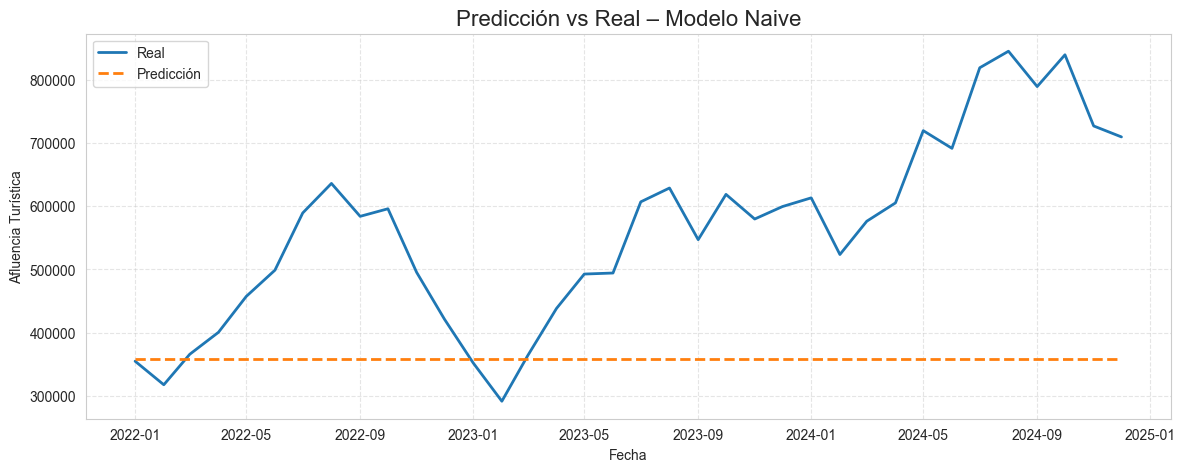

In [21]:
plot_predictions(
    y_test,
    naive_forecast,
    "Predicción vs Real – Modelo Naive"
)

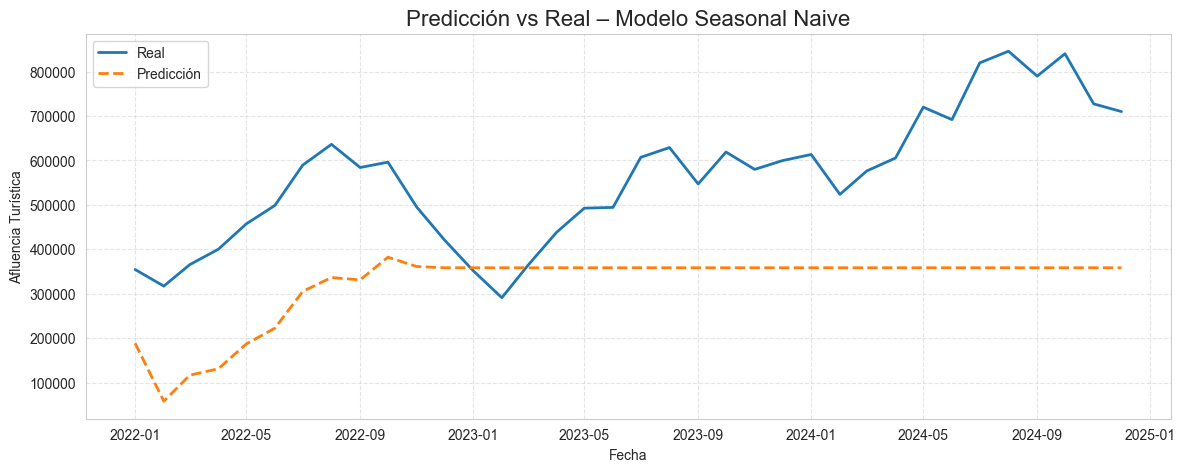

In [22]:
plot_predictions(
    y_test,
    seasonal_naive,
    "Predicción vs Real – Modelo Seasonal Naive"
)

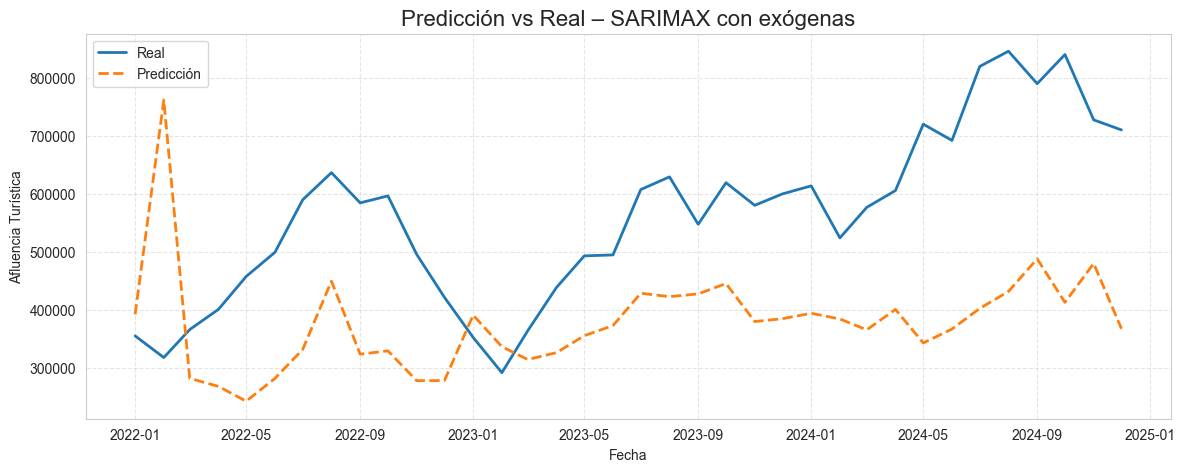

In [23]:
plot_predictions(
    y_test,
    y_pred_arima,
    "Predicción vs Real – SARIMAX con exógenas"
)

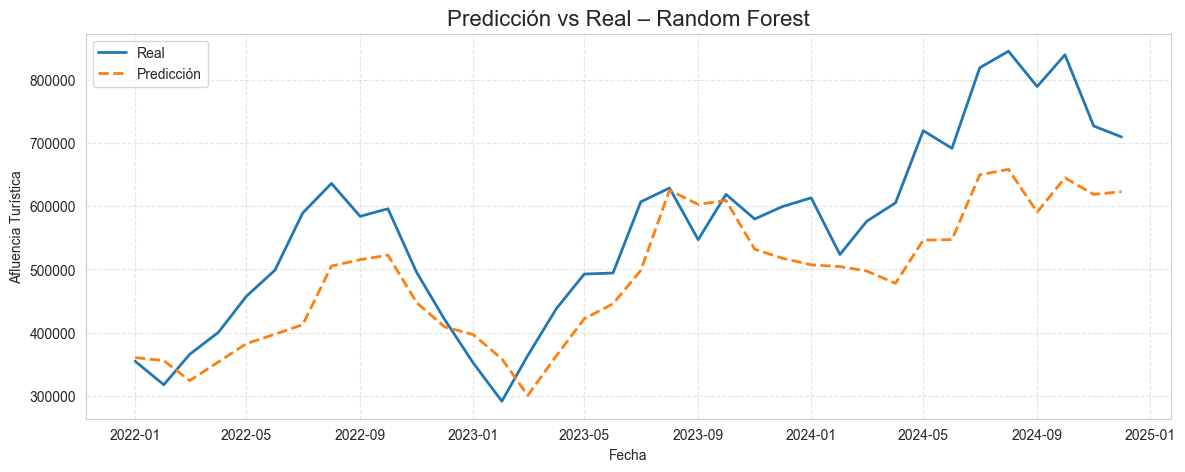

In [24]:
y_pred_rf_series = pd.Series(y_pred_rf, index=y_test.index)

plot_predictions(
    y_test,
    y_pred_rf_series,
    "Predicción vs Real – Random Forest"
)

In [25]:
# Partimos de df_cusco ya limpio, indexado por fecha, solo Cusco
# columnas: clima, ingreso, crimen, afluencia_turistica, departamento

# 1) Eliminar 2020 y 2021
df_cusco_np = df_cusco[~df_cusco.index.year.isin([2020, 2021])].copy()

print(df_cusco_np.index.min(), df_cusco_np.index.max(), df_cusco_np.shape)
y_np = df_cusco_np['afluencia_turistica']
print(y_np.describe())

from scipy import stats
print("Kurtosis (Fisher=False):", stats.kurtosis(y_np, fisher=False))

2014-01-01 00:00:00 2024-12-01 00:00:00 (108, 10)
count       108.000000
mean     551516.925926
std      123219.734729
min      291218.000000
25%      463757.500000
50%      548592.000000
75%      626689.000000
max      845650.000000
Name: afluencia_turistica, dtype: float64
Kurtosis (Fisher=False): 2.623469355173596


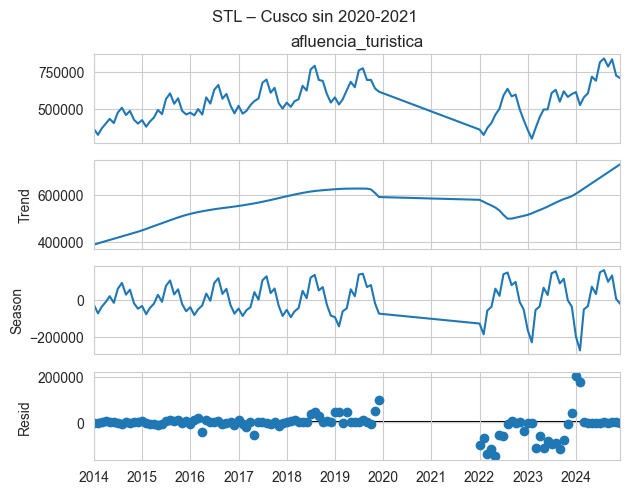

In [26]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

y_np = df_cusco_np['afluencia_turistica']

stl_np = sm.tsa.STL(y_np, period=12, robust=True)
res_stl_np = stl_np.fit()
res_stl_np.plot()
plt.suptitle("STL – Cusco sin 2020-2021", y=1.02)
plt.show()


In [27]:
num_cols = [
    'PRECTOTCORR','RH2M','T2M','T2M_MAX','T2M_MIN','WS10M',
    'Avg_Ingreso_total_mensual','cantidad_crimenes','afluencia_turistica'
]

corr_np = df_cusco_np[num_cols].corr()
corr_aflu_np = corr_np['afluencia_turistica'].sort_values(ascending=False)
print(corr_aflu_np)


afluencia_turistica          1.000000
T2M_MAX                      0.396143
cantidad_crimenes            0.323496
WS10M                        0.314968
T2M                          0.103621
Avg_Ingreso_total_mensual   -0.046016
T2M_MIN                     -0.067047
PRECTOTCORR                 -0.304080
RH2M                        -0.473372
Name: afluencia_turistica, dtype: float64


In [28]:
df_fe_np = df_cusco_np.copy()

# Lags de la afluencia
for lag in [1, 2, 3, 12]:
    df_fe_np[f'afluencia_lag{lag}'] = df_fe_np['afluencia_turistica'].shift(lag)

# Media móvil 3 meses
df_fe_np['afluencia_roll3'] = df_fe_np['afluencia_turistica'].rolling(window=3).mean()

# Features de calendario
df_fe_np['mes'] = df_fe_np.index.month
df_fe_np['anio'] = df_fe_np.index.year

# Eliminar filas con NaN
df_fe_np = df_fe_np.dropna()

print(df_fe_np.index.min(), df_fe_np.index.max(), df_fe_np.shape)


2015-01-01 00:00:00 2024-12-01 00:00:00 (96, 17)


In [29]:
train_np = df_fe_np.loc[:'2019-12-01']
test_np  = df_fe_np.loc['2022-01-01':]

y_train_np = train_np['afluencia_turistica']
y_test_np  = test_np['afluencia_turistica']

feature_cols_np = [c for c in df_fe_np.columns if c not in ['afluencia_turistica', 'departamento']]
X_train_np = train_np[feature_cols_np]
X_test_np  = test_np[feature_cols_np]

train_np.shape, test_np.shape  # -> (60, 17), (36, 17)


((60, 17), (36, 17))

In [30]:
import numpy as np, math
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    with np.errstate(divide='ignore', invalid='ignore'):
        res = np.abs((y_true - y_pred) / y_true)
    res = res[~np.isinf(res)]
    return np.nanmean(res) * 100

def metrics(y_true, y_pred):
    return {
        "MAE": float(mean_absolute_error(y_true, y_pred)),
        "RMSE": float(math.sqrt(mean_squared_error(y_true, y_pred))),
        "MAPE": float(mape(y_true, y_pred))
    }

# Naive (todo igual al último valor de train = 2019-12)
naive_forecast_np = pd.Series(y_train_np.iloc[-1], index=y_test_np.index)
baseline_naive_np = metrics(y_test_np, naive_forecast_np)

# Seasonal naive: aquí no hay datos de "año anterior", así que termina igual que naive
seasonal_naive_np = naive_forecast_np.copy()
baseline_seasonal_np = metrics(y_test_np, seasonal_naive_np)

baseline_naive_np, baseline_seasonal_np


({'MAE': 124591.83333333333,
  'RMSE': 157205.19441834965,
  'MAPE': 27.443198832339878},
 {'MAE': 124591.83333333333,
  'RMSE': 157205.19441834965,
  'MAPE': 27.443198832339878})

In [31]:
import statsmodels.api as sm
import itertools, warnings
warnings.filterwarnings("ignore")

y_train_arima_np = y_train_np
y_test_arima_np  = y_test_np

exog_cols_arima = [
    'PRECTOTCORR','RH2M','T2M','T2M_MAX','T2M_MIN','WS10M',
    'Avg_Ingreso_total_mensual','cantidad_crimenes'
]

exog_train_np = train_np[exog_cols_arima]
exog_test_np  = test_np[exog_cols_arima]

p = d = q = range(0, 2)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(1,1,1,12),(1,1,0,12),(0,1,1,12),(0,1,0,12)]

best_aic_np = np.inf
best_order_np = None
best_seasonal_np = None

for order in pdq:
    for sorder in seasonal_pdq:
        try:
            model_np = sm.tsa.statespace.SARIMAX(
                y_train_arima_np,
                exog=exog_train_np,
                order=order,
                seasonal_order=sorder,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            res_np = model_np.fit(disp=False)
            if res_np.aic < best_aic_np:
                best_aic_np = res_np.aic
                best_order_np = order
                best_seasonal_np = sorder
        except:
            continue

# Entrenar modelo final
model_np = sm.tsa.statespace.SARIMAX(
    y_train_arima_np,
    exog=exog_train_np,
    order=best_order_np,
    seasonal_order=best_seasonal_np,
    enforce_stationarity=False,
    enforce_invertibility=False
)
res_np = model_np.fit(disp=False)

# Forecast
pred_np = res_np.get_forecast(
    steps=len(y_test_arima_np),
    exog=exog_test_np
)
y_pred_arima_np = pred_np.predicted_mean

# 🔥 LÍNEA CLAVE: alinear el índice de fechas con el test
y_pred_arima_np.index = y_test_arima_np.index

# Métricas
sarimax_metrics_np = metrics(y_test_arima_np, y_pred_arima_np)
sarimax_metrics_np


{'MAE': 178819.54036236266,
 'RMSE': 198696.67205808265,
 'MAPE': 38.20567987716726}

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_np = RandomForestRegressor(
    n_estimators=500,
    max_depth=5,
    random_state=42
)

rf_np.fit(X_train_np, y_train_np)
y_pred_rf_np = rf_np.predict(X_test_np)
rf_metrics_np = metrics(y_test_np, y_pred_rf_np)
rf_metrics_np


{'MAE': 113504.82557876015,
 'RMSE': 132181.24287224287,
 'MAPE': 22.670811304976944}

In [33]:
import matplotlib.pyplot as plt

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(14,5))
    plt.plot(y_true.index, y_true.values, label='Real', linewidth=2)
    plt.plot(y_pred.index, y_pred.values, label='Predicción', linewidth=2, linestyle='--')
    plt.title(title, fontsize=16)
    plt.xlabel("Fecha")
    plt.ylabel("Afluencia Turística")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()


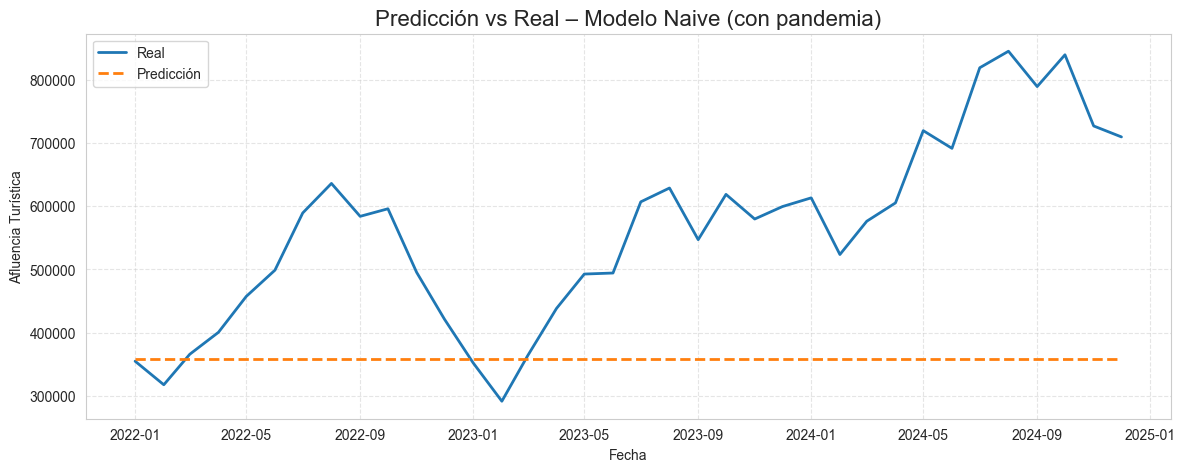

In [34]:
plot_predictions(
    y_test,
    naive_forecast,
    "Predicción vs Real – Modelo Naive (con pandemia)"
)


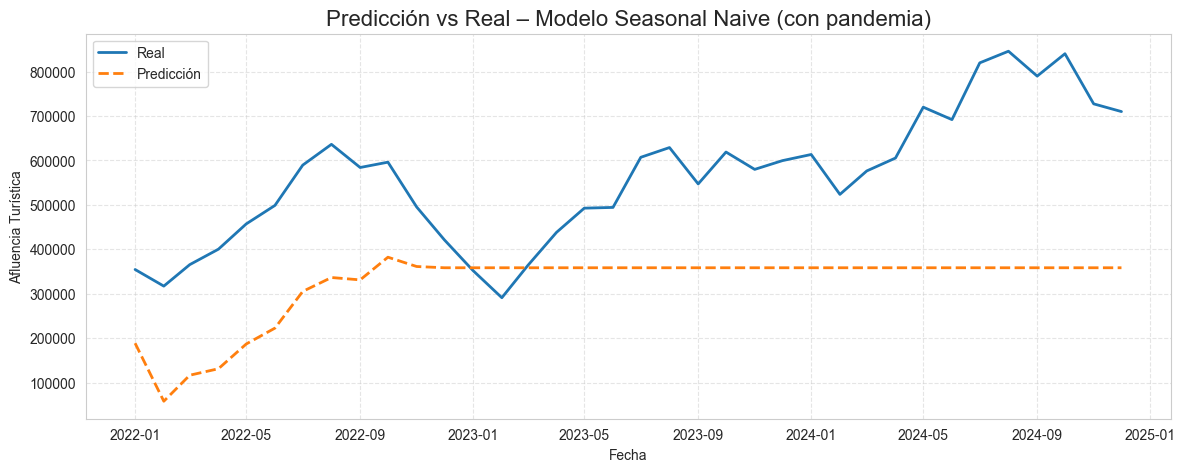

In [35]:
plot_predictions(
    y_test,
    seasonal_naive,
    "Predicción vs Real – Modelo Seasonal Naive (con pandemia)"
)


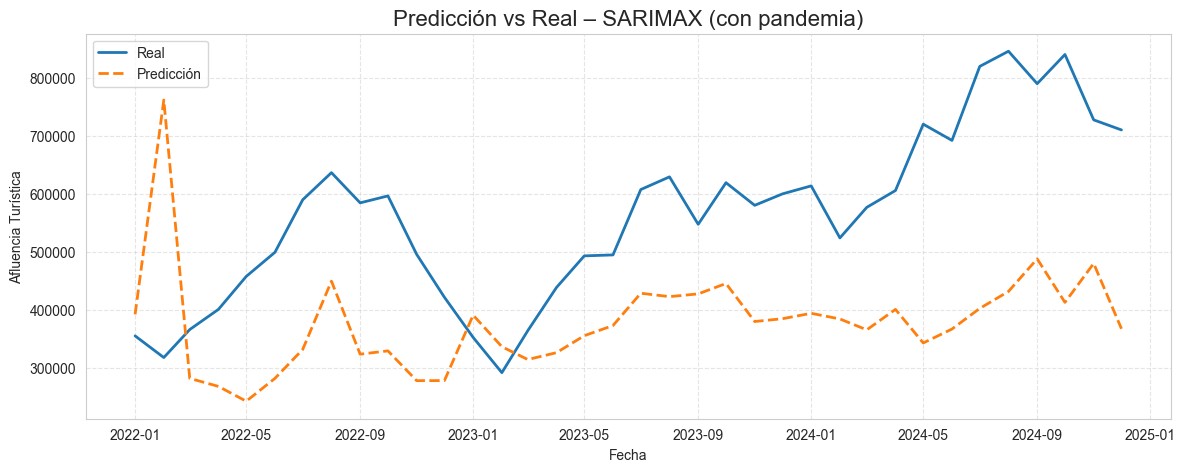

In [36]:
plot_predictions(
    y_test,
    y_pred_arima,
    "Predicción vs Real – SARIMAX (con pandemia)"
)


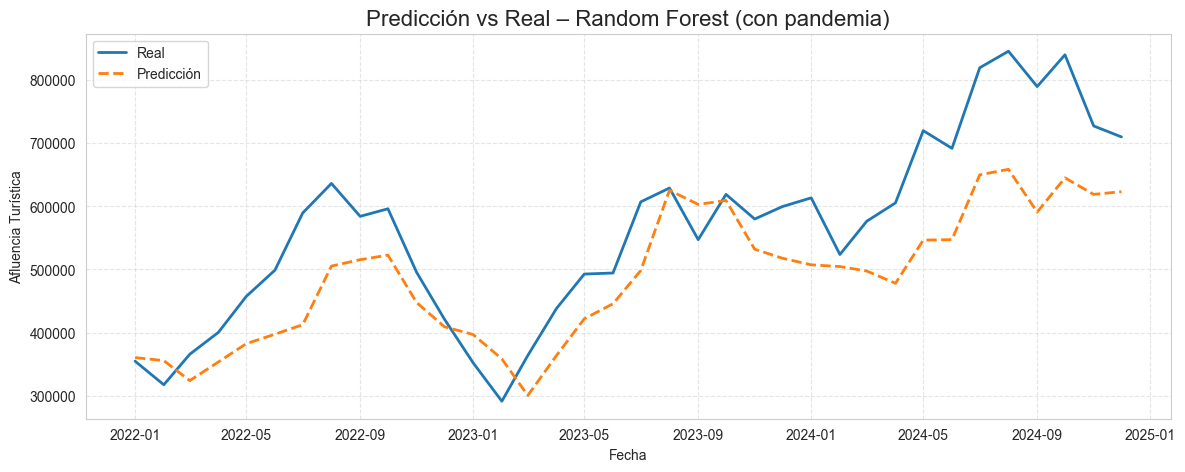

In [37]:
plot_predictions(
    y_test,
    pd.Series(y_pred_rf, index=y_test.index),
    "Predicción vs Real – Random Forest (con pandemia)"
)


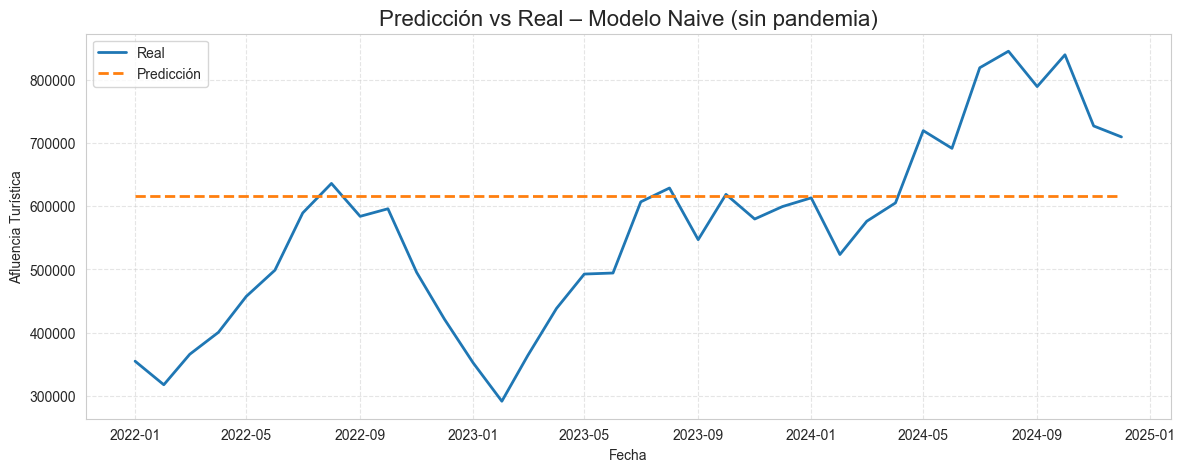

In [38]:
plot_predictions(
    y_test_np,
    naive_forecast_np,
    "Predicción vs Real – Modelo Naive (sin pandemia)"
)


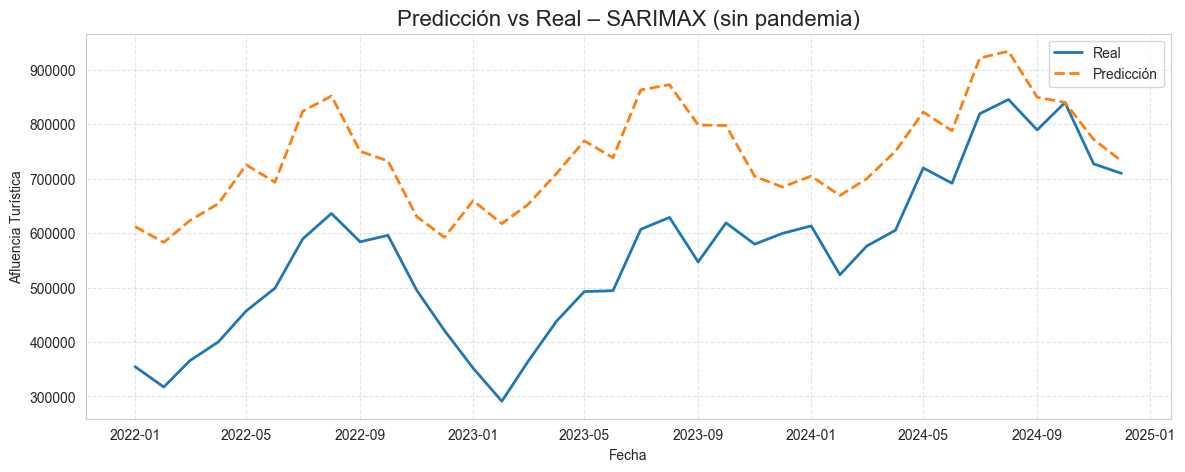

In [39]:
pred_np = res_np.get_forecast(
    steps=len(y_test_np),
    exog=exog_test_np
)

y_pred_arima_np = pred_np.predicted_mean.copy()

# 🔥 Asignar el índice correcto (muy importante)
y_pred_arima_np.index = y_test_np.index

# Graficar correctamente
plot_predictions(
    y_test_np,
    y_pred_arima_np,
    "Predicción vs Real – SARIMAX (sin pandemia)"
)



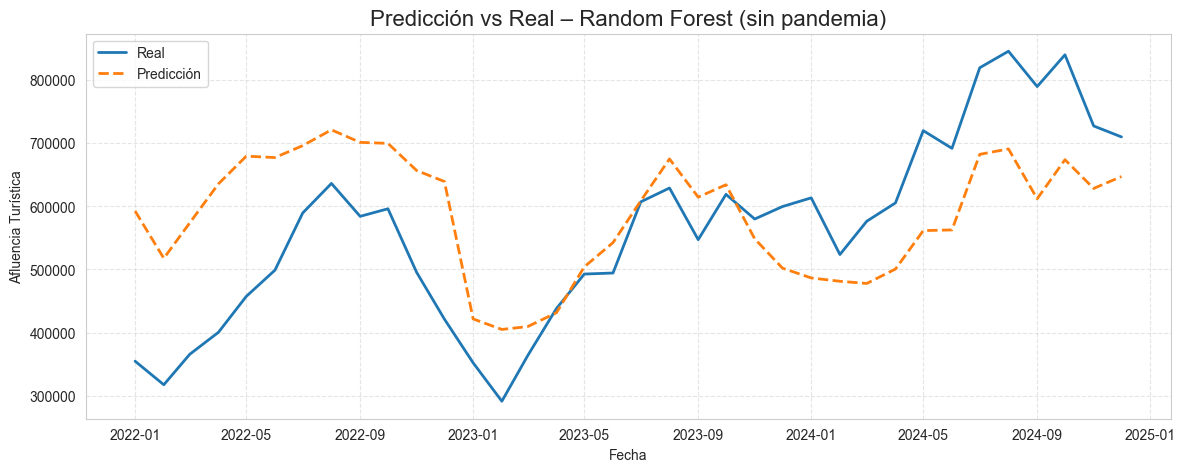

In [40]:
plot_predictions(
    y_test_np,
    pd.Series(y_pred_rf_np, index=y_test_np.index),
    "Predicción vs Real – Random Forest (sin pandemia)"
)


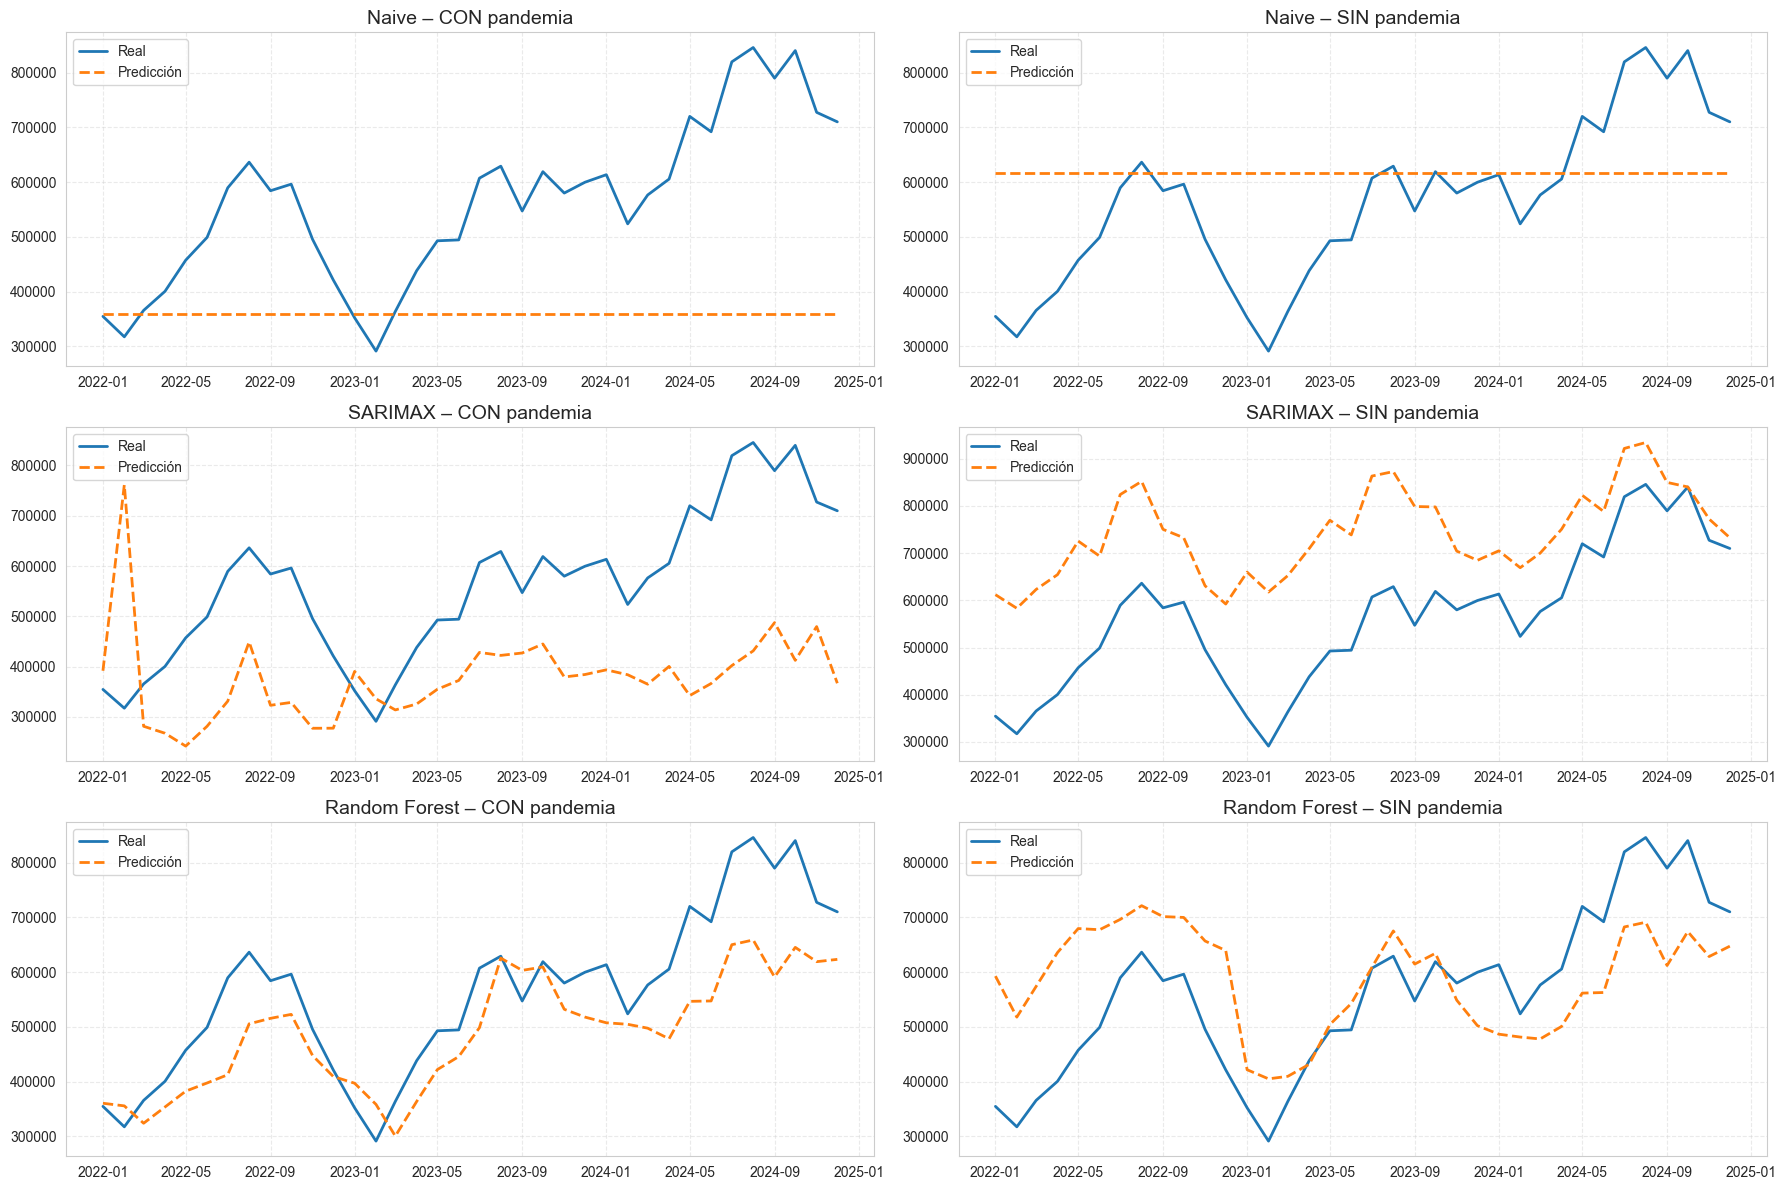

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# ============================
#        1) NAIVE
# ============================

# ---- Con pandemia ----
ax = axes[0, 0]
ax.plot(y_test.index, y_test.values, label="Real", linewidth=2)
ax.plot(naive_forecast.index, naive_forecast.values, label="Predicción", linestyle="--", linewidth=2)
ax.set_title("Naive – CON pandemia", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.4)
ax.legend()

# ---- Sin pandemia ----
ax = axes[0, 1]
ax.plot(y_test_np.index, y_test_np.values, label="Real", linewidth=2)
ax.plot(naive_forecast_np.index, naive_forecast_np.values, label="Predicción", linestyle="--", linewidth=2)
ax.set_title("Naive – SIN pandemia", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.4)
ax.legend()


# ============================
#        2) SARIMAX
# ============================

# ---- Con pandemia ----
ax = axes[1, 0]
ax.plot(y_test.index, y_test.values, label="Real", linewidth=2)
ax.plot(y_pred_arima.index, y_pred_arima.values, label="Predicción", linestyle="--", linewidth=2)
ax.set_title("SARIMAX – CON pandemia", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.4)
ax.legend()

# ---- Sin pandemia ----
ax = axes[1, 1]
ax.plot(y_test_np.index, y_test_np.values, label="Real", linewidth=2)
ax.plot(y_pred_arima_np.index, y_pred_arima_np.values, label="Predicción", linestyle="--", linewidth=2)
ax.set_title("SARIMAX – SIN pandemia", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.4)
ax.legend()


# ============================
#     3) RANDOM FOREST
# ============================

# ---- Con pandemia ----
ax = axes[2, 0]
ax.plot(y_test.index, y_test.values, label="Real", linewidth=2)
ax.plot(y_test.index, pd.Series(y_pred_rf, index=y_test.index),
        label="Predicción", linestyle="--", linewidth=2)
ax.set_title("Random Forest – CON pandemia", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.4)
ax.legend()

# ---- Sin pandemia ----
ax = axes[2, 1]
ax.plot(y_test_np.index, y_test_np.values, label="Real", linewidth=2)
ax.plot(y_test_np.index, pd.Series(y_pred_rf_np, index=y_test_np.index),
        label="Predicción", linestyle="--", linewidth=2)
ax.set_title("Random Forest – SIN pandemia", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.4)
ax.legend()

plt.tight_layout()
plt.show()


In [42]:
import numpy as np, math
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    with np.errstate(divide='ignore', invalid='ignore'):
        res = np.abs((y_true - y_pred) / y_true)
    res = res[~np.isinf(res)]
    return np.nanmean(res) * 100

def metrics(y_true, y_pred):
    return {
        "MAE": float(mean_absolute_error(y_true, y_pred)),
        "RMSE": float(math.sqrt(mean_squared_error(y_true, y_pred))),
        "MAPE": float(mape(y_true, y_pred))
    }


In [43]:
import pandas as pd

resultados = []

# =========================
#   CON PANDEMIA
# =========================

# Naive
m_naive_full = metrics(y_test, naive_forecast)
resultados.append({
    "Escenario": "Con pandemia",
    "Modelo": "Naive",
    **m_naive_full
})

# SARIMAX
m_sarimax_full = metrics(y_test, y_pred_arima)
resultados.append({
    "Escenario": "Con pandemia",
    "Modelo": "SARIMAX",
    **m_sarimax_full
})

# Random Forest
m_rf_full = metrics(y_test, pd.Series(y_pred_rf, index=y_test.index))
resultados.append({
    "Escenario": "Con pandemia",
    "Modelo": "Random Forest",
    **m_rf_full
})


# =========================
#   SIN PANDEMIA
# =========================

# Naive
m_naive_np = metrics(y_test_np, naive_forecast_np)
resultados.append({
    "Escenario": "Sin pandemia",
    "Modelo": "Naive",
    **m_naive_np
})

# SARIMAX
m_sarimax_np = metrics(y_test_np, y_pred_arima_np)
resultados.append({
    "Escenario": "Sin pandemia",
    "Modelo": "SARIMAX",
    **m_sarimax_np
})

# Random Forest
m_rf_np = metrics(y_test_np, pd.Series(y_pred_rf_np, index=y_test_np.index))
resultados.append({
    "Escenario": "Sin pandemia",
    "Modelo": "Random Forest",
    **m_rf_np
})

df_resultados = pd.DataFrame(resultados)
df_resultados


,Escenario,Modelo,MAE,RMSE,MAPE
0,Con pandemia,Naive,208935.277778,250245.627781,33.162275
1,Con pandemia,SARIMAX,213808.611682,240743.219600,37.312482
2,Con pandemia,Random Forest,85851.430486,102126.407170,14.618382
3,Sin pandemia,Naive,124591.833333,157205.194418,27.443199
4,Sin pandemia,SARIMAX,178819.540362,198696.672058,38.205680
5,Sin pandemia,Random Forest,113504.825579,132181.242872,22.670811


In [44]:
df_resultados_rounded = df_resultados.copy()
for col in ["MAE", "RMSE", "MAPE"]:
    df_resultados_rounded[col] = df_resultados_rounded[col].round(2)

df_resultados_rounded


,Escenario,Modelo,MAE,RMSE,MAPE
0,Con pandemia,Naive,208935.28,250245.63,33.16
1,Con pandemia,SARIMAX,213808.61,240743.22,37.31
2,Con pandemia,Random Forest,85851.43,102126.41,14.62
3,Sin pandemia,Naive,124591.83,157205.19,27.44
4,Sin pandemia,SARIMAX,178819.54,198696.67,38.21
5,Sin pandemia,Random Forest,113504.83,132181.24,22.67


In [47]:
from xgboost import XGBRegressor

xgb_full = XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb_full.fit(X_train, y_train)
y_pred_xgb_full = xgb_full.predict(X_test)

xgb_metrics_full = metrics(y_test, y_pred_xgb_full)
xgb_metrics_full


{'MAE': 93858.65625, 'RMSE': 111221.20546011, 'MAPE': 16.186425233939}

In [48]:
import lightgbm as lgb

lgb_full = lgb.LGBMRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    num_leaves=31,
    random_state=42
)

lgb_full.fit(X_train, y_train)
y_pred_lgb_full = lgb_full.predict(X_test)

lgb_metrics_full = metrics(y_test, y_pred_lgb_full)
lgb_metrics_full


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 15
[LightGBM] [Info] Start training from score 468870.595238
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

{'MAE': 83811.28412514535,
 'RMSE': 100376.19311864553,
 'MAPE': 16.405831195550157}

In [49]:
xgb_np = XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb_np.fit(X_train_np, y_train_np)
y_pred_xgb_np = xgb_np.predict(X_test_np)

xgb_metrics_np = metrics(y_test_np, y_pred_xgb_np)
xgb_metrics_np


{'MAE': 99880.84375, 'RMSE': 115527.27733310433, 'MAPE': 19.72046106236228}

In [50]:
lgb_np = lgb.LGBMRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    num_leaves=31,
    random_state=42
)

lgb_np.fit(X_train_np, y_train_np)
y_pred_lgb_np = lgb_np.predict(X_test_np)

lgb_metrics_np = metrics(y_test_np, y_pred_lgb_np)
lgb_metrics_np


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 60, number of used features: 15
[LightGBM] [Info] Start training from score 572919.733333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

{'MAE': 122351.11846982341,
 'RMSE': 139371.5155080862,
 'MAPE': 26.592072107124938}

In [53]:
model_results = []

# CON pandemia
model_results.append({"Escenario": "Con pandemia", "Modelo": "XGBoost", **xgb_metrics_full})
model_results.append({"Escenario": "Con pandemia", "Modelo": "LightGBM", **lgb_metrics_full})

# SIN pandemia
model_results.append({"Escenario": "Sin pandemia", "Modelo": "XGBoost", **xgb_metrics_np})
model_results.append({"Escenario": "Sin pandemia", "Modelo": "LightGBM", **lgb_metrics_np})

df_model_results = pd.DataFrame(model_results)
df_model_results.round(2)


,Escenario,Modelo,MAE,RMSE,MAPE
0,Con pandemia,XGBoost,93858.66,111221.21,16.19
1,Con pandemia,LightGBM,83811.28,100376.19,16.41
2,Sin pandemia,XGBoost,99880.84,115527.28,19.72
3,Sin pandemia,LightGBM,122351.12,139371.52,26.59


In [54]:
import matplotlib.pyplot as plt

def plot_ts(ax, y_true, y_pred, title):
    ax.plot(y_true.index, y_true.values, label="Real", linewidth=2)
    ax.plot(y_pred.index, y_pred.values, label="Predicción", linestyle="--", linewidth=2)
    ax.set_title(title, fontsize=13)
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.legend()


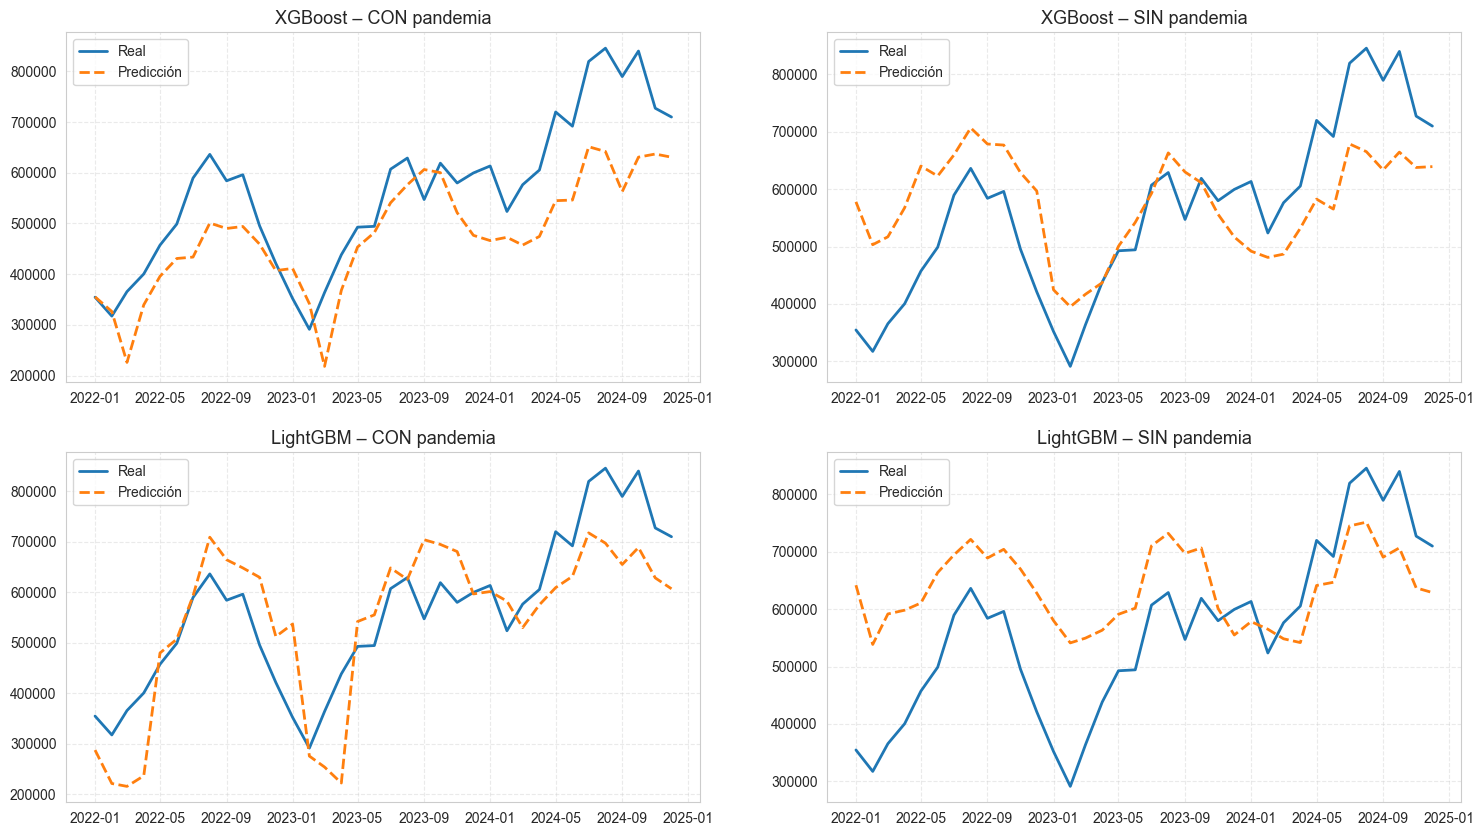

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# ============================
#     1) XGBOOST – CON pandemia
# ============================
ax = axes[0, 0]
y_pred_xgb_full_series = pd.Series(y_pred_xgb_full, index=y_test.index)
plot_ts(ax, y_test, y_pred_xgb_full_series, "XGBoost – CON pandemia")

# ============================
#     2) XGBOOST – SIN pandemia
# ============================
ax = axes[0, 1]
y_pred_xgb_np_series = pd.Series(y_pred_xgb_np, index=y_test_np.index)
plot_ts(ax, y_test_np, y_pred_xgb_np_series, "XGBoost – SIN pandemia")

# ============================
#     3) LIGHTGBM – CON pandemia
# ============================
ax = axes[1, 0]
y_pred_lgb_full_series = pd.Series(y_pred_lgb_full, index=y_test.index)
plot_ts(ax, y_test, y_pred_lgb_full_series, "LightGBM – CON pandemia")

# ============================
#     4) LIGHTGBM – SIN pandemia
# ============================
ax = axes[1, 1]
y_pred_lgb_np_series = pd.Series(y_pred_lgb_np, index=y_test_np.index)
plot_ts(ax, y_test_np, y_pred_lgb_np_series, "LightGBM – SIN pandemia")

plt.show()